# Spaceship Titanic Project 

In [1]:
# core import
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
from openpyxl.utils.cell import get_column_letter
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn import *
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)

In [3]:
#Creating the variables for the data
train = pd.read_csv('/Users/tracyzhang/Desktop/4305/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/tracyzhang/Desktop/4305/spaceship-titanic/test.csv')


<AxesSubplot:ylabel='CryoSleep'>

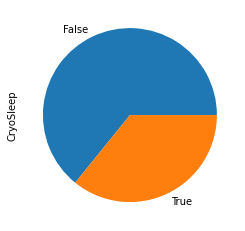

In [4]:
# The below pie graph about that people need the cryosleep vs people do not need the cryosleep

train['CryoSleep'].value_counts().plot.pie()

<AxesSubplot:ylabel='Destination'>

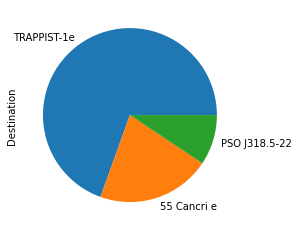

In [5]:
#A pie graph showing that most passengers were travelling to Trappist-1e
train['Destination'].value_counts().plot.pie()

<AxesSubplot:xlabel='Age', ylabel='Count'>

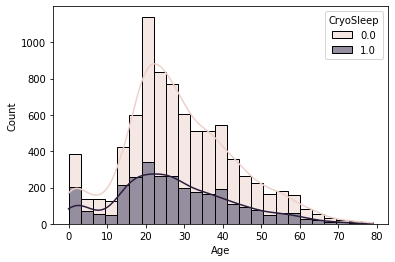

In [6]:
# The below distribution is positively skewed
# Outliers will be removed and using log transformation to change it tonormally distriuted data
sns.histplot(x='Age',hue='CryoSleep',data=train, bins=25,multiple="stack",kde = True)

# Was Age a factor in transporting passengers to an alternate dimension?

Text(0.5, 1.0, 'Comparsion of Passengers Transported to their Destination based on Age')

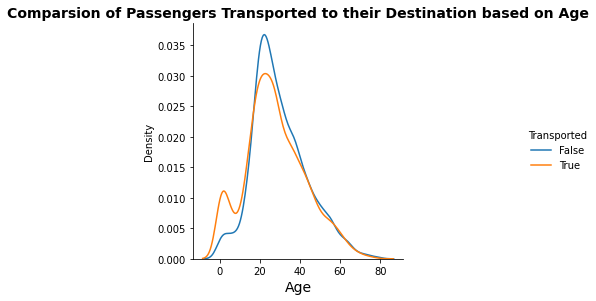

In [7]:
# Children/ infants were more likely to be transported to their destination
sns.FacetGrid(train, hue='Transported', height=4).map(sns.kdeplot,'Age').add_legend()
plt.xlabel('Age', fontsize =14)
plt.title('Comparsion of Passengers Transported to their Destination based on Age',fontsize=14,fontweight='bold')

# Which destination had the most passengers that were transported to an alternate dimension?

In [8]:
# However, it is the case that since TRAPPIST-1e was the most common destination
# Then, naturally there would be more passengers transported there as well
de = pd.DataFrame(train['Destination'].value_counts())
de['destination']=de.index
de['count']=de.iloc[:,:-1]
de.reset_index(drop=True, inplace=True)
de = de.drop(de.columns[[0]],axis = 1)
de

,destination,count
0,TRAPPIST-1e,5915
1,55 Cancri e,1800
2,PSO J318.5-22,796


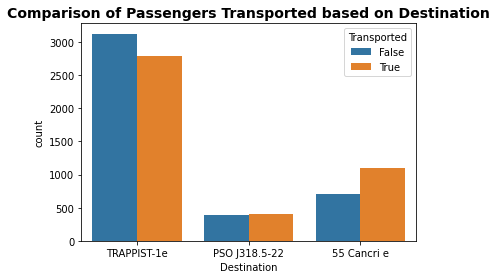

In [9]:
# For those that were transported, the most frequent destination was TRAPPIST-1e
plt.figure
sns.countplot(x='Destination',hue='Transported',data=train)
plt.xticks
plt.title('Comparison of Passengers Transported based on Destination', fontsize=14, fontweight='bold')
plt.show()

# How many passengers were transported vs. How many passengers were not transported by the Spaceship Titanic?

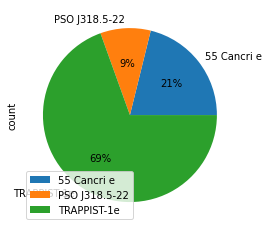

In [10]:
#Pie chart showing that the amount transported vs not transported is very close
plt.figure
de.groupby(['destination']).sum().plot(kind='pie', y='count', autopct='%1.0f%%')
plt.show()


In [11]:
#Count how many transported vs not transported
tp = pd.DataFrame(train['Transported'].value_counts())
tp['transported']=tp.index
tp['count']=tp.iloc[:,:-1]
tp.reset_index(drop=True, inplace=True)
tp = tp.drop(tp.columns[[0]],axis = 1)
tp

,transported,count
0,True,4378
1,False,4315


# Did being in a state of Cryosleep have an effect on whether the passenger was transported or not?

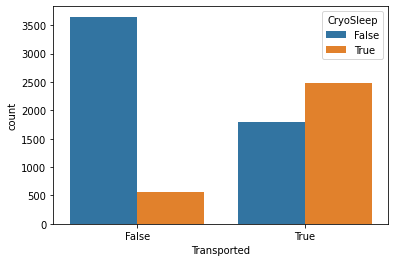

In [12]:
# Graph showing that those that were transported were also more frequently in a state of Cryosleep
plt.figure
sns.countplot(x='Transported',hue='CryoSleep',data=train)
plt.xticks
plt.show()

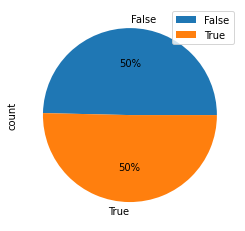

In [13]:
#Pie chart showing that the amount transported vs not transported is very close
plt.figure
tp.groupby(['transported']).sum().plot(kind='pie',y='count',autopct='%1.0f%%')
plt.show()

In [14]:
#Showing which columns have missing values for both train and test data sets
print('TRAIN SET MISSING VALUES:')
print(train.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [15]:
#Showing the duplicates in both data sets
#As shown, there are no duplicates
print(f'Duplicates in train set: {train.duplicated().sum()}, ({np.round(100*train.duplicated().sum()/len(train),1)}%)')
print('')
print(f'Duplicates in test set: {test.duplicated().sum()}, ({np.round(100*test.duplicated().sum()/len(test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [16]:
#Returns top 5 rows in train dataframe
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [17]:
# A concise summary of the train dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [18]:
#Returns the number of unique values for each column
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [19]:
#Summary of statistics in the dataframe columns
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [20]:
#Train data set missing values
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [21]:
#Finding the averages of null values in the train data set
train.isna().sum()/len(train)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [22]:
#Returns top 5 rows in test dataframe
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [23]:
# A concise summary of the test dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [24]:
#Returns the number of unique values for each column in the test data
test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [25]:
#Summary of statistics in the dataframe columns for test
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [26]:
#Test data set missing values
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [27]:
#Finding the averages of null values in the test data set
test.isna().sum()/len(test)

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

# About the data

<AxesSubplot:ylabel='Destination'>

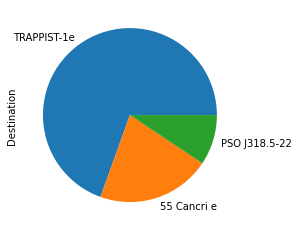

In [28]:
#Pie chart showing that trappist-1e is the most common destination
train['Destination'].value_counts().plot.pie()

<AxesSubplot:ylabel='HomePlanet'>

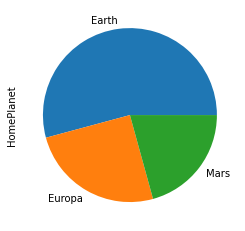

In [29]:
#Pie chart showing that most passengers were from Earth
train['HomePlanet'].value_counts().plot.pie()

<AxesSubplot:ylabel='Frequency'>

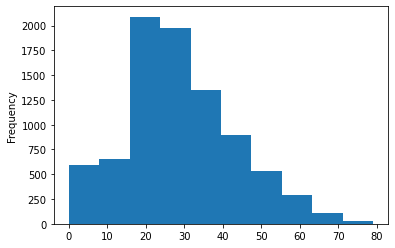

In [30]:
#A histogram showing a distribution of the ages of the passengers
#Most were around 20-40 years old 
train['Age'].plot.hist()

VIP transported: 38.191 %


<AxesSubplot:xlabel='VIP', ylabel='count'>

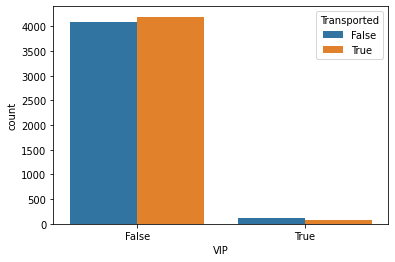

In [31]:
# how many of VIP got transported or not
import seaborn as sns

vip_transported = len(train.query('VIP==True and Transported==True'))
vip = len(train[train.VIP == True])
print('VIP transported:',round((vip_transported / vip)*100,3),'%')
sns.countplot(x=train['VIP'], hue=train['Transported'])

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

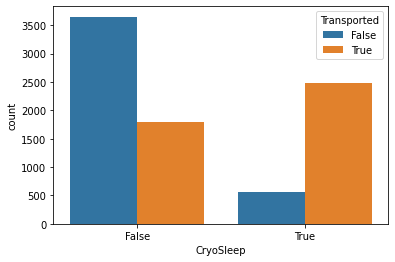

In [32]:
# cryosleep transported/not

sns.countplot(x=train['CryoSleep'], hue=train['Transported'])

Text(0.5, 1.0, 'Target distribution')

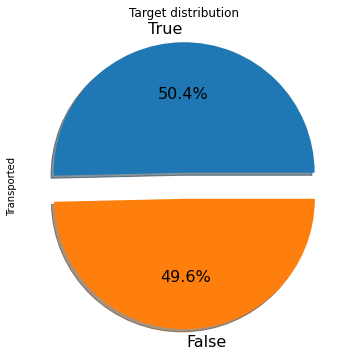

In [33]:
#A pie chart showing how many were transported vs not transported
# About half were transported and half were not

# Figure size
plt.figure(figsize=(6,6))

# Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")

# Does age affect whether the passengers need transported or not?

Text(0.5, 0, 'Age Unit: years')

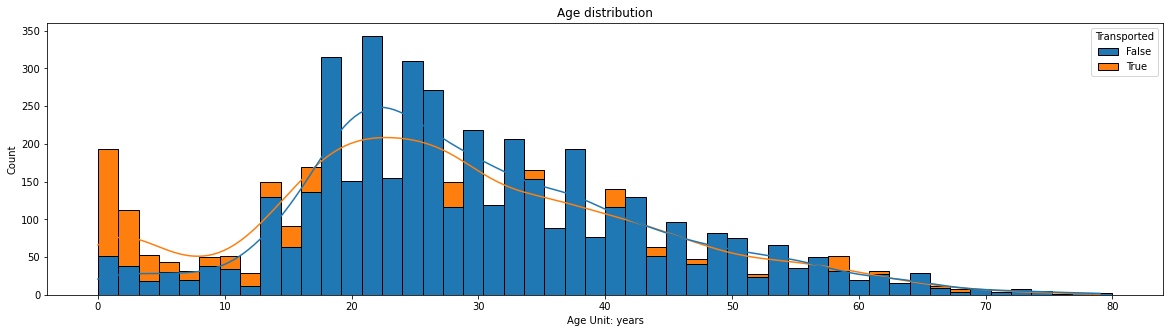

In [34]:
# Figure size
plt.figure(figsize=(20,5))

# Histogram plot
sns.histplot(data=train, x='Age',hue='Transported',binwidth=1.6, alpha=1, kde=True)

# Labels
plt.title('Age distribution')
plt.xlabel('Age Unit: years')

# Does expenditure affect whether the passengers need transported or not?

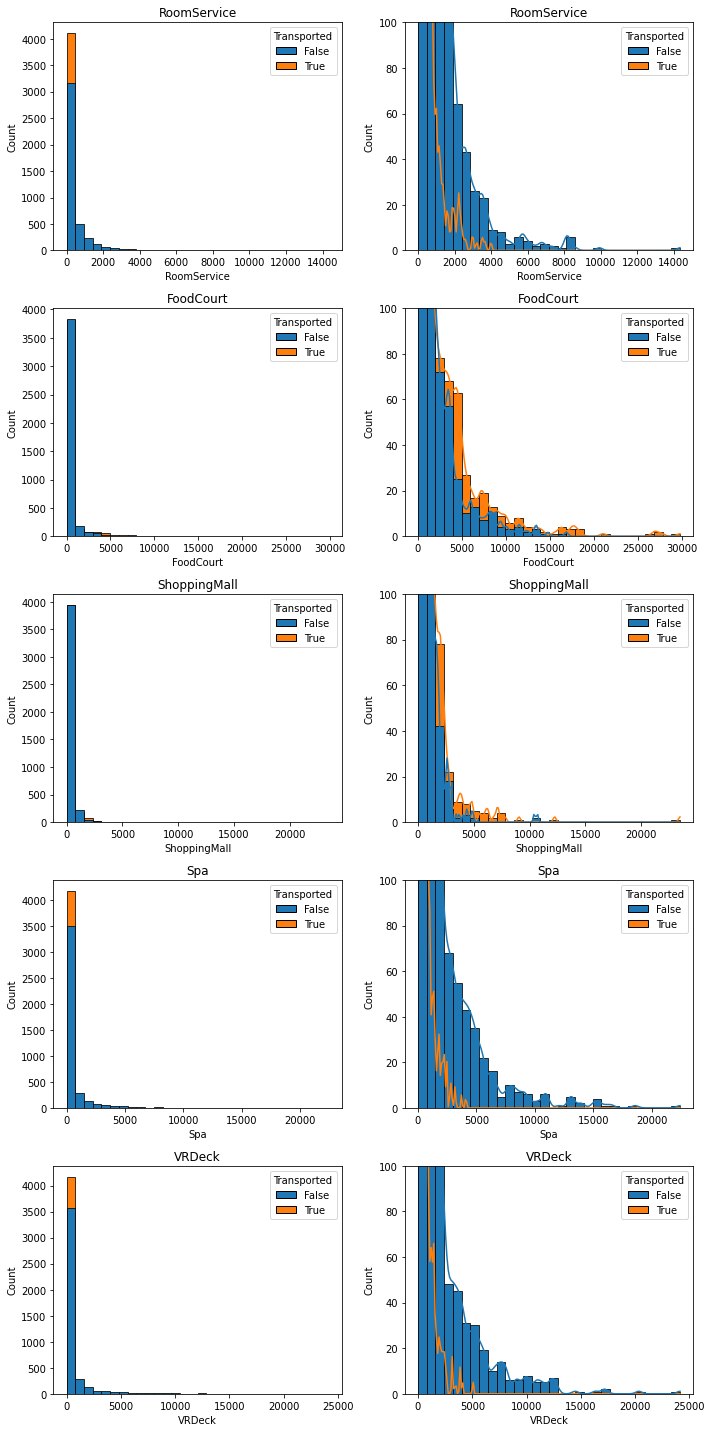

In [35]:
# Expenditure features
Expenditure=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plotting Expenditures
fig=plt.figure(figsize=(10,20))
for i, variable_name in enumerate(Expenditure):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=variable_name, axes=ax, bins=30, kde=False,alpha=1, hue='Transported')
    ax.set_title(variable_name)
    
    # Right plot
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=variable_name, axes=ax, bins=30, kde=True,alpha=1, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(variable_name)
fig.tight_layout()  
plt.show()

# Does HomePlanet, need Cryosleep or not, Destination, and is VIP or not  affect whether the passengers need transported or not?

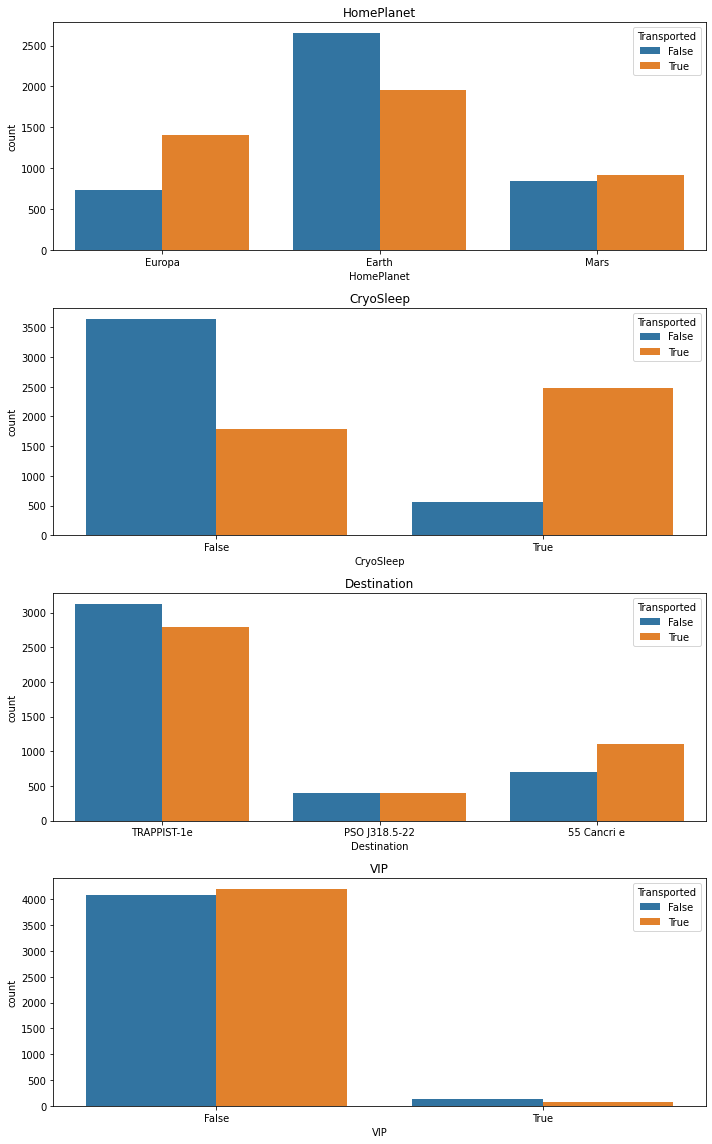

In [36]:
# Categorical
Categorical=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categoricals
fig=plt.figure(figsize=(10,16))
for i, variable_name in enumerate(Categorical):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=variable_name, axes=ax, hue='Transported')
    ax.set_title(variable_name)
fig.tight_layout() 
plt.show()

# Data Cleaning

In [37]:
# Loading data
train = pd.read_csv('/Users/tracyzhang/Desktop/4305/spaceship-titanic/train.csv')
test = pd.read_csv('/Users/tracyzhang/Desktop/4305/spaceship-titanic/test.csv')

# Dropping 'Name'

train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

In [38]:
# Displaying Train Data
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [39]:
# Labels
y=train['Transported'].copy().astype(int)
X=train.drop('Transported', axis=1).copy()

# Concatenate dataframes
data=pd.concat([X, test], axis=0).reset_index(drop=True)

# Handling Missing Values 

In [40]:
# A. Using Most frequent categorical data
# B. Using Mean for Numerical data

impute_cols_cat = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP']
impute_cols_num = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy="most_frequent" )
imputer_cat.fit(train[impute_cols_cat])
train[impute_cols_cat] = imputer_cat.transform(train[impute_cols_cat])
test[impute_cols_cat] = imputer_cat.transform(test[impute_cols_cat])

imputer_num = SimpleImputer(strategy="mean")
imputer_num.fit(train[impute_cols_num])
train[impute_cols_num] = imputer_num.transform(train[impute_cols_num])
test[impute_cols_num] = imputer_num.transform(test[impute_cols_num])

# Age Features

In [41]:
# Age features for train data

train.loc[train['Age']<=18,'Age_group']='Child'
train.loc[(train['Age']>18) & (train['Age']<=25),'Age_group']='Adolescent'
train.loc[(train['Age']>25), 'Age_group']='Adult'

# Age features for test data

test.loc[test['Age']<=18,'Age_group']='Child'
test.loc[(test['Age']>18) & (test['Age']<=25),'Age_group']='Adolescent'
test.loc[test['Age']>25,'Age_group']='Adult'

# Cabin Features

In [42]:

# Dividing Cabin into Deck, Number and Side
train[['Deck', 'Num', 'Side']] = train['Cabin'].str.split('/', 2, expand=True)
test[['Deck', 'Num', 'Side']] = test['Cabin'].str.split('/', 2, expand=True)


# Dropping Cabin and Passenger ID
train.drop(['Cabin' ], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

# Shopping Group Features

Text(0.5, 1.0, 'comsumption level for Age group ')

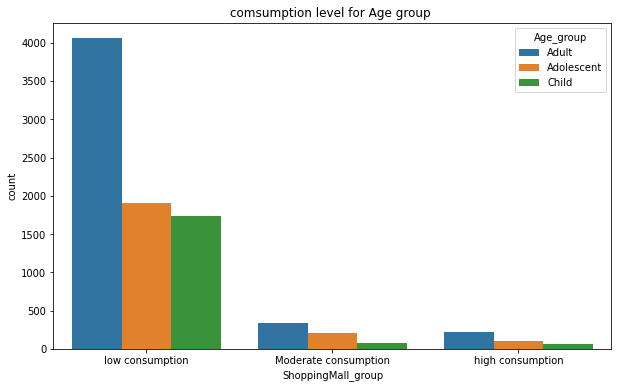

In [43]:

#  train data
train['ShoppingMall_group']=np.nan
train.loc[train['ShoppingMall']<=500,'ShoppingMall_group']='low consumption'
train.loc[(train['ShoppingMall']>500) & (train['ShoppingMall']<=1000),'ShoppingMall_group']='Moderate consumption'
train.loc[(train['ShoppingMall']>1000), 'ShoppingMall_group']='high consumption'

# test data
test['ShoppingMall_group']=np.nan
test.loc[test['ShoppingMall']<=500,'ShoppingMall_group']='low consumption'
test.loc[(test['ShoppingMall']>500) & (test['ShoppingMall']<=1000),'ShoppingMall_group']='Moderate consumption'
test.loc[test['ShoppingMall']>1000,'ShoppingMall_group']='high consumption'

# Plotting New Features
plt.figure(figsize=(10,6))
g=sns.countplot(data=train, x='ShoppingMall_group', hue='Age_group', order=['low consumption','Moderate consumption','high consumption'])
plt.title('comsumption level for Age group ')

In [44]:
# Generating New Feature for Numericals
def feats_derived_from_stats(df, features, text=None):
    '''Given a dataframe and a list of features (numerical), 
    this function creates new features with the mean, min, and standard deviations of the 
    selected features and returns the full dataframe
    '''
    df[f'{text}_avg'] = df[features].mean(axis=1)
    #df[f'{text}_min'] = df[features].min(axis=1)
    df[f'{text}_std'] = df[features].std(axis=1)
    
    return df       

In [45]:
# Features for VRDeck, Spa and Room Service
f_VSR = ['VRDeck', 'Spa', 'RoomService']
train = feats_derived_from_stats(train, f_VSR, 'VSR')
test = feats_derived_from_stats(test, f_VSR, 'VSR')

In [46]:
# New Features for Shopping Mall and Food Court
f_SF = ['ShoppingMall', 'FoodCourt']
train = feats_derived_from_stats(train, f_SF, 'SF')
test = feats_derived_from_stats(test, f_SF, 'SF')

In [47]:
train.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
Age_group             0
Deck                  0
Num                   0
Side                  0
ShoppingMall_group    0
VSR_avg               0
VSR_std               0
SF_avg                0
SF_std                0
dtype: int64

In [48]:
test.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Age_group             0
Deck                  0
Num                   0
Side                  0
ShoppingMall_group    0
VSR_avg               0
VSR_std               0
SF_avg                0
SF_std                0
dtype: int64

# Preprocessing

In [49]:
# Dividing Passenger ID back into train and test data 
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

In [50]:
# Dropping Passenger ID
X.drop(['PassengerId' ], axis=1, inplace=True)
X_test.drop(['PassengerId'], axis=1, inplace=True)

# Log Transformation for dealing with Skewed Data

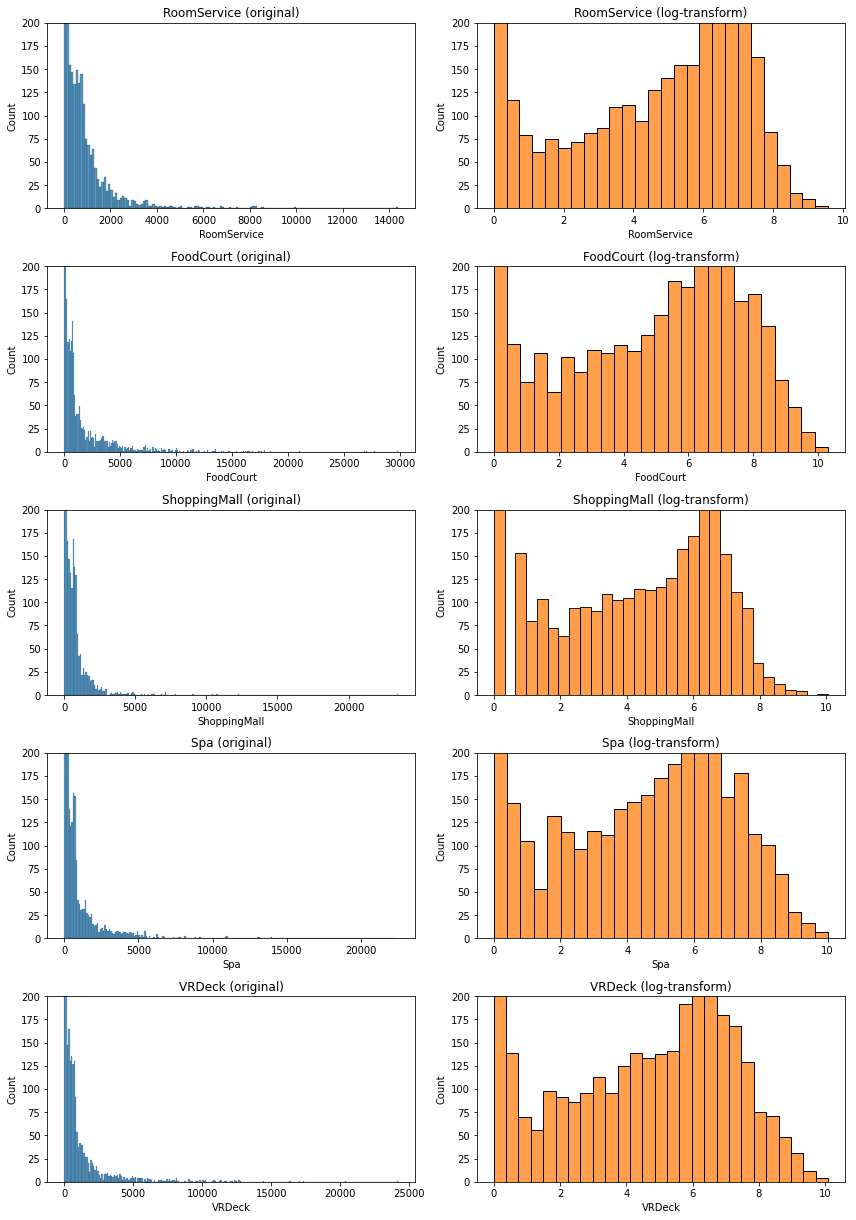

In [51]:
# Plotting Results

fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [52]:
# Setting Log Transformation
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [53]:
# Encoding Numericals and Scaling
non_numerical_categories = list(train.select_dtypes(include=['object','bool']).columns)
print(non_numerical_categories)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported', 'Age_group', 'Deck', 'Num', 'Side', 'ShoppingMall_group']


<AxesSubplot:xlabel='Side', ylabel='count'>

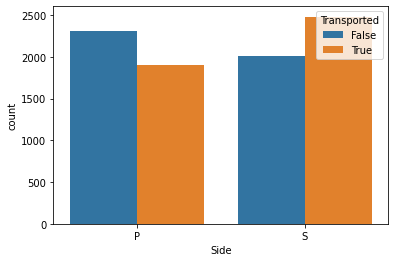

In [54]:
# Does Side affect whether passenger is transported ?
sns.countplot(x=train['Side'], hue=train['Transported'])

In [55]:
# Displaying Test Data
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group,Deck,Num,Side,ShoppingMall_group,VSR_avg,VSR_std,SF_avg,SF_std
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Adult,G,3,S,low consumption,0.000000,0.000000,0.0,0.000000
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Adolescent,F,4,S,low consumption,941.000000,1629.859810,4.5,6.363961
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Adult,C,0,S,low consumption,0.000000,0.000000,0.0,0.000000
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Adult,C,1,S,low consumption,255.333333,299.500139,3326.0,4703.674308
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Adolescent,F,5,S,Moderate consumption,3.333333,5.773503,317.5,449.012806


<AxesSubplot:xlabel='Deck', ylabel='count'>

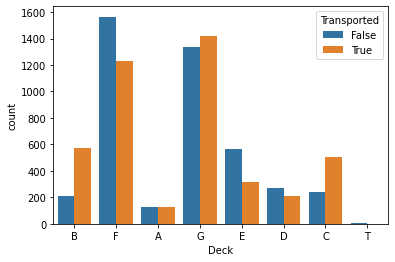

In [56]:
# Does Deck affect whether passenger is transported ?
sns.countplot(x=train['Deck'], hue=train['Transported'])

In [57]:
train['Transported'] = train['Transported'].map({True: 1, False: 0})

# Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(train, test, categories):
    le = LabelEncoder()
    for cat in categories:
        le.fit(train[cat])
        print(le.classes_)
        train[cat] = le.transform(train[cat])
        test[cat] = le.transform(test[cat])
        
    return train, test

train, test = encode_labels(train, test, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck','Side'])

['Earth' 'Europa' 'Mars']
[False True]
['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
[False True]
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T']
['P' 'S']


In [59]:
# Displaying Train Data
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,Age_group,Deck,Num,Side,ShoppingMall_group,VSR_avg,VSR_std,SF_avg,SF_std
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,...,0,Adult,1,0,0,low consumption,0.0,0.000000,0.0,0.000000
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,...,1,Adolescent,5,0,1,low consumption,234.0,274.727137,17.0,11.313708
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,...,0,Adult,0,0,1,low consumption,2269.0,3850.350114,1788.0,2528.613850
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,...,0,Adult,0,0,1,low consumption,1174.0,1868.777943,827.0,644.881384
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,...,1,Child,5,1,1,low consumption,290.0,281.725043,110.5,57.275649


<AxesSubplot:>

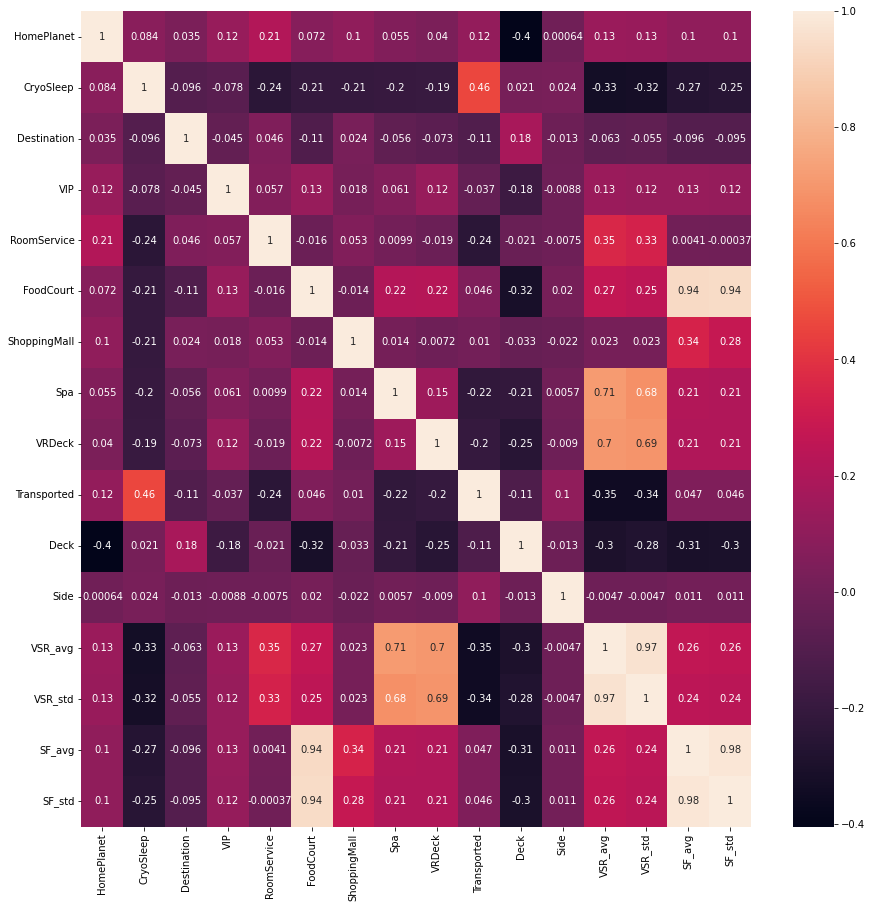

In [60]:
# by using the heatmap can find out that the correlation relationship between all the variables
# Homeplant has the weakest correlation with Side, there exists the strongest correlation between SF_avg and SF_std,
# and both SF_avg and SF_std has the strong correlation with Foodcourt
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True)


In [61]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in train.columns:
    if train[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

# Encoding

In [62]:
#The preprocessing package provides commonly used utility functions and transformer classes to 
# change raw feature vectors into representations more suitable for downstream estimators.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
#This method performs Fit part of the data first, find the overall indicators of the part, 
#such as mean, variance, maximum and minimum values, 
# and then transform the train data to achieve data standardization, normalization, and so on.
for i in cat:
    train[i] = le.fit_transform(train[i])
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,Age_group,Deck,Num,Side,ShoppingMall_group,VSR_avg,VSR_std,SF_avg,SF_std
0,0,1,0,2,39,0,0.0,0.0,0.0,0.0,...,0,1,1,0,0,2,0.0,0.000000,0.0,0.000000
1,1,0,0,2,24,0,109.0,9.0,25.0,549.0,...,1,0,5,0,1,2,234.0,274.727137,17.0,11.313708
2,2,1,0,2,58,1,43.0,3576.0,0.0,6715.0,...,0,1,0,0,1,2,2269.0,3850.350114,1788.0,2528.613850
3,3,1,0,2,33,0,0.0,1283.0,371.0,3329.0,...,0,1,0,0,1,2,1174.0,1868.777943,827.0,644.881384
4,4,0,0,2,16,0,303.0,70.0,151.0,565.0,...,1,2,5,1,1,2,290.0,281.725043,110.5,57.275649


In [64]:
#This method performs Fit part of the data first, find the overall indicators of the part, 
#such as mean, variance, maximum and minimum values, 
# and then transform the train data to achieve data standardization, normalization, and so on.
for i in cat:
    if i!='Transported':
        test[i] = le.fit_transform(test[i])
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_group,Deck,Num,Side,ShoppingMall_group,VSR_avg,VSR_std,SF_avg,SF_std
0,0,0,1,2,27,0,0.0,0.0,0.0,0.0,0.0,1,6,820,1,2,0.000000,0.000000,0.0,0.000000
1,1,0,0,2,19,0,0.0,9.0,0.0,2823.0,0.0,0,5,927,1,2,941.000000,1629.859810,4.5,6.363961
2,2,1,1,0,31,0,0.0,0.0,0.0,0.0,0.0,1,2,0,1,2,0.000000,0.000000,0.0,0.000000
3,3,1,0,2,38,0,0.0,6652.0,0.0,181.0,585.0,1,2,1,1,2,255.333333,299.500139,3326.0,4703.674308
4,4,0,0,2,20,0,10.0,0.0,635.0,0.0,0.0,0,5,1029,1,0,3.333333,5.773503,317.5,449.012806


In [65]:
# put the "Transported" columns separated for doing ML algorithm
xtrain = train.drop('Transported',1)
ytrain = train.Transported
xtest = test

In [66]:
#Ml algorithm
import autokeras as ak
from xgboost import XGBClassifier

In [67]:
# Keras as Model 1
# It uses a process of searching through neural network architectures to best address a modeling task
reg = ak.StructuredDataClassifier(max_trials=5, overwrite=True)

In [68]:
# Validation Data
# By default, use validation_split to specify the percentage.
reg.fit(xtrain, ytrain, epochs=10)

Trial 5 Complete [00h 00m 11s]
val_accuracy: 0.8002329468727112

Best val_accuracy So Far: 0.8002329468727112
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4707 - accuracy: 0.7812
Epoch 2/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.7964
Epoch 3/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4196 - accuracy: 0.8024
Epoch 4/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8042
Epoch 5/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.8055
Epoch 6/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8077
Epoch 7/10
272/272 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8108
Epoch 8/10
272/272 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8116
Epoch 9/10
272/272 [

2022-05-01 22:12:15.756244: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


In [69]:
# Evaluate the best model with testing data and print out that model
print(reg.evaluate(xtrain, ytrain))

272/272 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8092
[0.38991522789001465, 0.8091567754745483]


In [70]:
#Predict with the best model, and validation set is choosed as 6
yred_keras = reg.predict(xtest)
yred_keras[:6]

134/134 [==============================] - 0s 3ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [71]:
# XGB (Model 2)
# XGBoost, which stands for 
# Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree machine learning library. 
#It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

model=XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=-1,cv=ak)


In [72]:
#Train the XGBoost Model
model.fit(xtrain,ytrain)


[22:12:23] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              cv=<module 'autokeras' from '/Users/tracyzhang/opt/anaconda3/envs/spaceshiptitanic/lib/python3.9/site-packages/autokeras/__init__.py'>,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [73]:
#Get score for XGBmodel
model.score(xtrain,ytrain)


0.9705510180605085

In [74]:
# make predictions using the fit model on the test dataset
ypred_final = model.predict(xtest)
ypred_final

array([1, 0, 1, ..., 1, 1, 1])

# submission

In [75]:
sub = pd.read_csv('/Users/tracyzhang/Desktop/4305/spaceship-titanic/sample_submission.csv')

In [76]:
sub['Transported'] = ypred_final

In [77]:
sub['Transported'] = sub['Transported'].replace({1:True,0:False})
sub.set_index('PassengerId',inplace=True)
sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


# presentation link

In [ ]:
# 